## False Coloring Introduction 


#### Purpose
Render grayscale digital pathology datasets into virtual H&E color space for 3D pathology. This notebook is used to describe some of the main features of the FalseColor python package, and view the results. The main processing application of this package is color_script.py located in the scripts folder. 

#### Using this notebook

##### GPU processing
NOTE: for using the non-flat field based fc.rapidFalseColor method additional background subtraction is unneeded.
1. Background levels are calculated and subtracted from both channels and image levels are clipped to the range of 0-65535.
2. Edges are enhanced using the sharpenImage method in coloring.py
3. The images are false colored using the rapidFalseColor method from coloring.py

In [ ]:
#Import python modules
import falsecolor.coloring as fc
from falsecolor.process import ViewImage
import numpy as np
import os
import h5py as h5

In [2]:
#load data in ./h5_sample_data/example_data.h5
file_path = os.path.join(os.getcwd(),'h5_sample_data/prostate/data.h5')

with h5.File(file_path,'r') as f:
    nuclei = f['t00000/s00/0/cells'][:]
    cyto = f['t00000/s01/0/cells'][:]
f.close()

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ffbbf25190>)

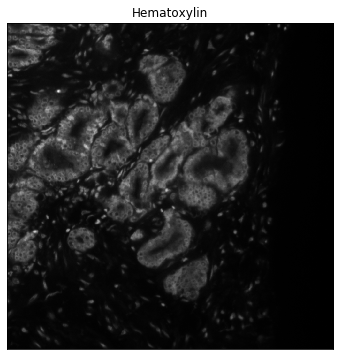

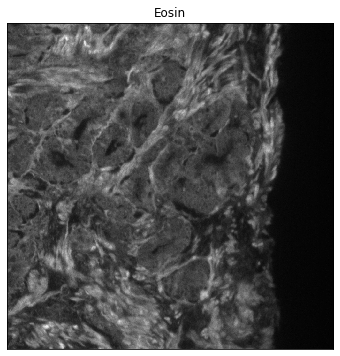

In [3]:
#View Raw Data from nuclear/cytoplasmic channels
ViewImage(nuclei[0], figsize = (6,6), cmap = 'gray', title = 'Hematoxylin')
ViewImage(cyto[0], figsize = (6,6), cmap = 'gray', title = 'Eosin')

In [4]:
#grab RGB settings for both channels using fc.getColorSettings()

settings_dict = fc.getColorSettings(key = 'HE')
nuclei_RGBsettings = settings_dict['nuclei']
cyto_RGBsettings = settings_dict['cyto']

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ffbc07de50>)

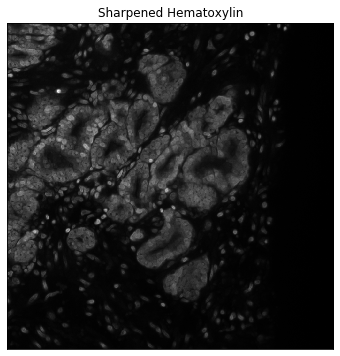

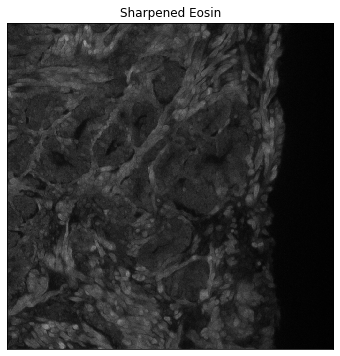

In [5]:
#Enhance edges by sharpening images using fc.sharpenImage()

sharp_nuclei = fc.sharpenImage(nuclei[0])
sharp_cyto = fc.sharpenImage(cyto[0])

ViewImage(sharp_nuclei, cmap = 'gray', figsize = (6,6), title = 'Sharpened Hematoxylin')
ViewImage(sharp_cyto, cmap = 'gray', figsize = (6,6), title = 'Sharpened Eosin')

In [6]:
#create Virtual H&E rendering of the sharpened images
pseudo_prostate = fc.rapidFalseColor(sharp_nuclei, sharp_cyto, nuclei_RGBsettings, cyto_RGBsettings)

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ffcc330640>)

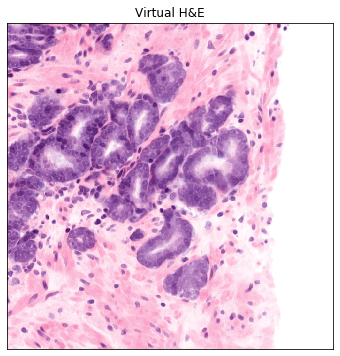

In [7]:
#View Result
ViewImage(pseudo_prostate, figsize = (6,6), title = 'Virtual H&E')